# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | berezovyy
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | adrar
Processing Record 10 of Set 1 | ebon
Processing Record 11 of Set 1 | gaspe
Processing Record 12 of Set 1 | general acha
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | partur
Processing Record 15 of Set 1 | fort st. john
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | feijo
Processing Record 21 of Set 1 | hami
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of Se

Processing Record 35 of Set 4 | coquimbo
Processing Record 36 of Set 4 | alice springs
Processing Record 37 of Set 4 | tommot
Processing Record 38 of Set 4 | nampa
Processing Record 39 of Set 4 | haiku-pauwela
Processing Record 40 of Set 4 | yalutorovsk
Processing Record 41 of Set 4 | tolanaro
Processing Record 42 of Set 4 | uturoa
Processing Record 43 of Set 4 | bundaberg north
Processing Record 44 of Set 4 | enewetak
Processing Record 45 of Set 4 | shangri-la
City not found. Skipping...
Processing Record 46 of Set 4 | punta arenas
Processing Record 47 of Set 4 | berdigestyakh
Processing Record 48 of Set 4 | jinchang
Processing Record 49 of Set 4 | lorengau
Processing Record 0 of Set 5 | puertollano
Processing Record 1 of Set 5 | tinde
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | kapuskasing
Processing Record 4 of Set 5 | palopo
Processing Record 5 of Set 5 | igarka
Processing Record 6 of Set 5 | mahabe
City not found. Skipping...
Processing Record 7 of Set 5 | 

Processing Record 27 of Set 8 | dudinka
Processing Record 28 of Set 8 | rio branco
Processing Record 29 of Set 8 | pacific grove
Processing Record 30 of Set 8 | upington
Processing Record 31 of Set 8 | pointe aux piments
Processing Record 32 of Set 8 | quiberon
Processing Record 33 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 34 of Set 8 | remire-montjoly
Processing Record 35 of Set 8 | lang son
Processing Record 36 of Set 8 | nikolayevsk-on-amure
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | goure
Processing Record 39 of Set 8 | timbuktu
Processing Record 40 of Set 8 | selfoss
Processing Record 41 of Set 8 | swakopmund
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | keflavik
Processing Record 44 of Set 8 | krasnokamensk
Processing Record 45 of Set 8 | richards bay
Processing Record 46 of Set 8 | zakynthos
Processing Record 47 of Set 8 | ivnya
Processing Record 48 of Set 8 | simenqian
Processing Record 49 o

Processing Record 18 of Set 12 | chernyshevsk
Processing Record 19 of Set 12 | lockwood
Processing Record 20 of Set 12 | kita
Processing Record 21 of Set 12 | queenstown
Processing Record 22 of Set 12 | nuku'alofa
Processing Record 23 of Set 12 | corner brook
Processing Record 24 of Set 12 | 'anat al qadimah
Processing Record 25 of Set 12 | sarakhs
Processing Record 26 of Set 12 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 27 of Set 12 | rundu
Processing Record 28 of Set 12 | eastham
Processing Record 29 of Set 12 | oristano
Processing Record 30 of Set 12 | marhamat
Processing Record 31 of Set 12 | hithadhoo
Processing Record 32 of Set 12 | mar del plata
Processing Record 33 of Set 12 | north bend
Processing Record 34 of Set 12 | yokadouma
Processing Record 35 of Set 12 | hankasalmi
Processing Record 36 of Set 12 | pitimbu
Processing Record 37 of Set 12 | markovo
Processing Record 38 of Set 12 | kazanlak
Processing Record 39 of Set 12 | nanzhan

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount gambier,-37.8333,140.7667,13.34,86,100,5.23,AU,1697156008
1,tura,25.5198,90.2201,20.72,81,0,1.37,IN,1697156124
2,ushuaia,-54.8000,-68.3000,7.81,71,75,15.95,AR,1697156125
3,berezovyy,51.6667,135.7000,13.84,53,80,3.19,RU,1697156125
4,chibougamau,49.9168,-74.3659,6.79,93,75,2.06,CA,1697156125


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,13.34,86,100,5.23,AU,1697156008
1,tura,25.5198,90.2201,20.72,81,0,1.37,IN,1697156124
2,ushuaia,-54.8000,-68.3000,7.81,71,75,15.95,AR,1697156125
3,berezovyy,51.6667,135.7000,13.84,53,80,3.19,RU,1697156125
4,chibougamau,49.9168,-74.3659,6.79,93,75,2.06,CA,1697156125


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

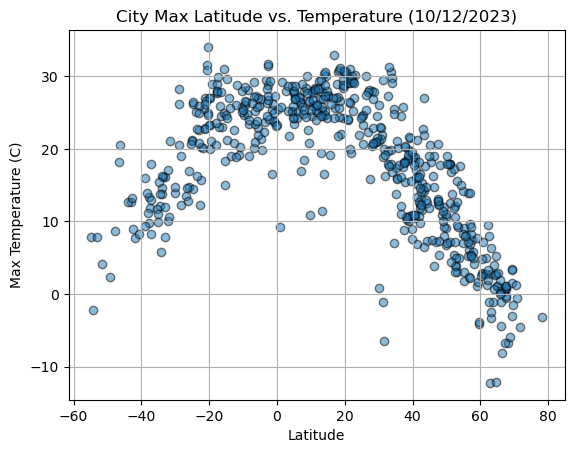

In [53]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
lat_v_temp = plt.scatter(x, y, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (10/12/2023)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

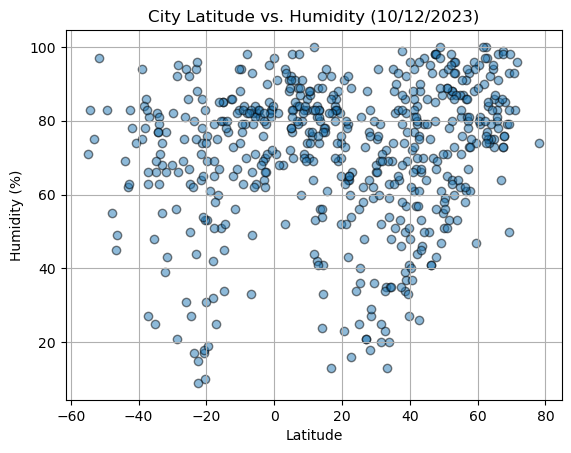

In [54]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
lat_v_hum = plt.scatter(x, y, alpha=0.5, edgecolors='black')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/12/2023)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

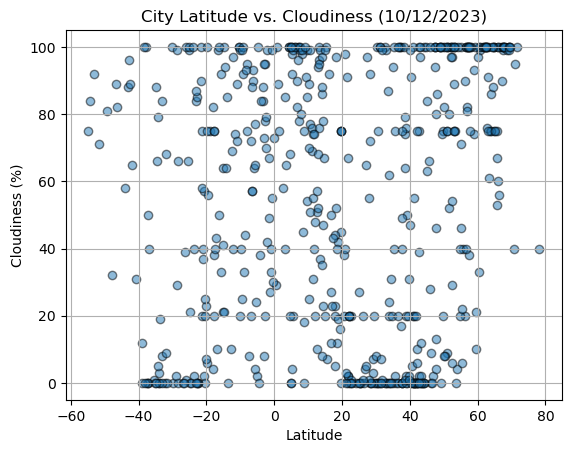

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
lat_v_clo = plt.scatter(x, y, alpha=0.5, edgecolors='black')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (10/12/2023)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

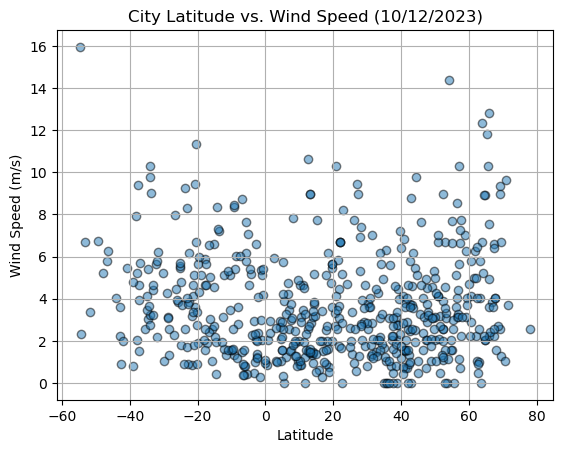

In [56]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
lat_v_wns = plt.scatter(x, y, alpha=0.5, edgecolors='black')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (10/12/2023)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [129]:
# Define a function to create Linear Regression plots
def plot_linreg(x,y,y_lab, coord):
    
    # Run regression on Southern Hemisphere
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x ,y, alpha=0.5)
    plt.plot(x, regress_values, color="red")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_lab)
    plt.title(f"City Latitude vs. {y_lab} (10/12/2023)")
    plt.show()

In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tura,25.5198,90.2201,20.72,81,0,1.37,IN,1697156124
3,berezovyy,51.6667,135.7000,13.84,53,80,3.19,RU,1697156125
4,chibougamau,49.9168,-74.3659,6.79,93,75,2.06,CA,1697156125
6,badger,64.8000,-147.5333,1.10,75,100,2.06,US,1697156125
7,georgetown,5.4112,100.3354,27.19,83,20,0.00,MY,1697155941


In [131]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,13.34,86,100,5.23,AU,1697156008
2,ushuaia,-54.8000,-68.3000,7.81,71,75,15.95,AR,1697156125
5,puerto ayora,-0.7393,-90.3518,23.74,83,55,4.15,EC,1697156125
11,general acha,-37.3770,-64.6043,11.92,27,0,4.66,AR,1697156126
12,grytviken,-54.2811,-36.5092,-2.23,83,84,2.31,GS,1697156127


###  Temperature vs. Latitude Linear Regression Plot

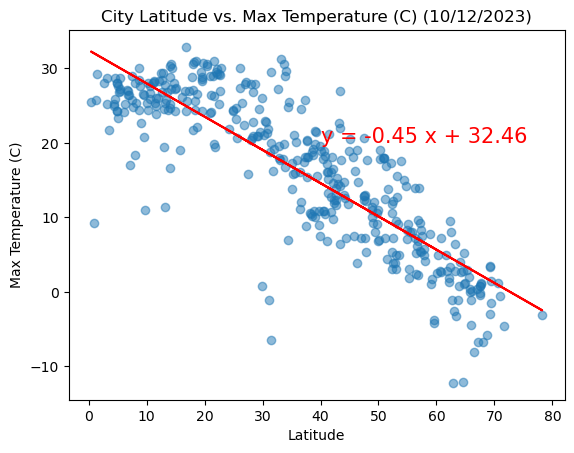

In [132]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
y_lab = ("Max Temperature (C)")
coord = (40, 20)
plot_linreg(x, y, y_lab, coord)

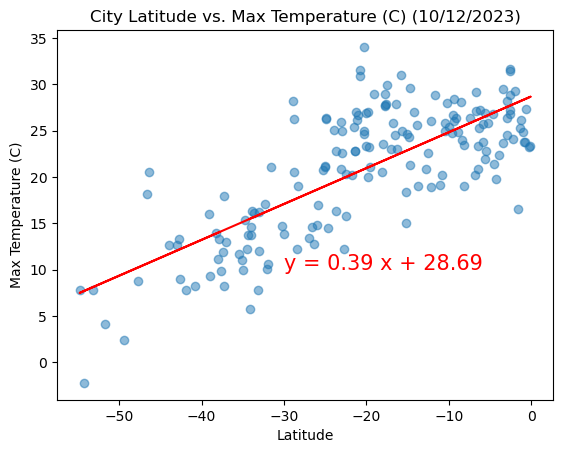

In [135]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
y_lab = ("Max Temperature (C)")
coord = (-30,10)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** As the the latitude becomes closer to 0, the max temperature trends upward as expected. As the latitude gets further from 0, the temperature trends downward.

### Humidity vs. Latitude Linear Regression Plot

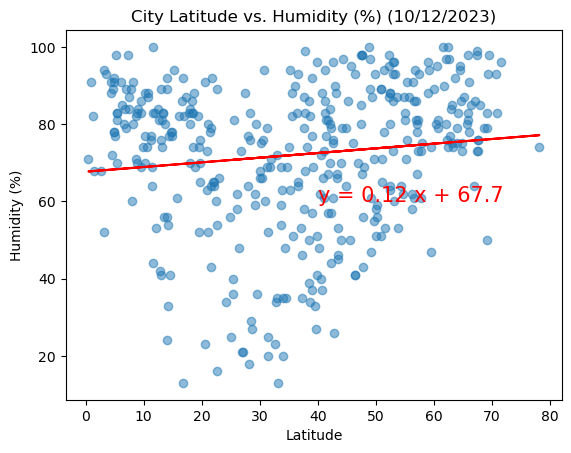

In [138]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
y_lab = ("Humidity (%)")
coord = (40, 60)
plot_linreg(x, y, y_lab, coord)

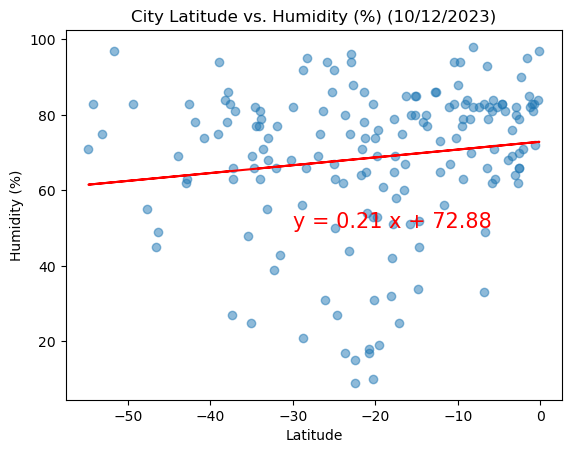

In [139]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
y_lab = ("Humidity (%)")
coord = (-30,50)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** Humidity does not seem to be correlated to latitude. The data is very scattered so the regression is not vey representative of the data.

### Cloudiness vs. Latitude Linear Regression Plot

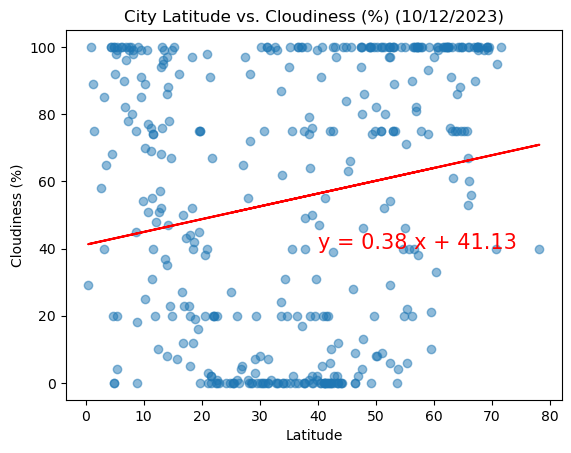

In [142]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
y_lab = ("Cloudiness (%)")
coord = (40, 40)
plot_linreg(x, y, y_lab, coord)

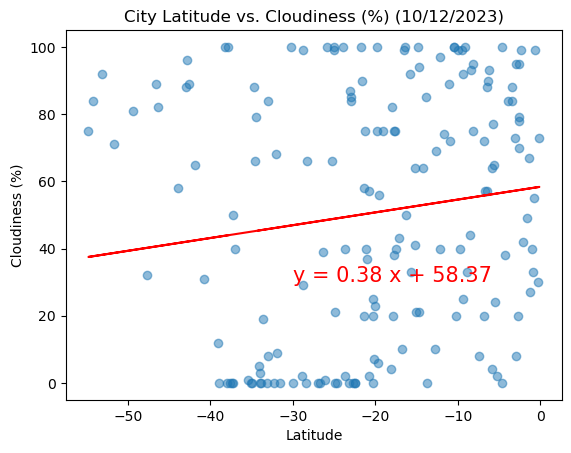

In [146]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
y_lab = ("Cloudiness (%)")
coord = (-30,30)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** Similar to humidity, cloudiness does not seem to be strongly correlated to changes in latitude. Because the data is so scattered, the line of regression is not representative of the data overall.

### Wind Speed vs. Latitude Linear Regression Plot

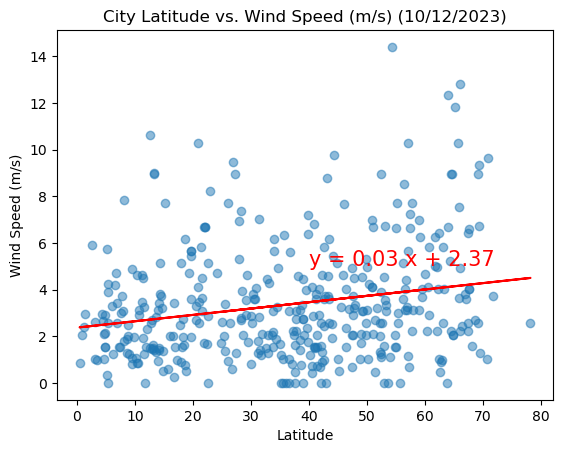

In [148]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
y_lab = ("Wind Speed (m/s)")
coord = (40, 5)
plot_linreg(x, y, y_lab, coord)

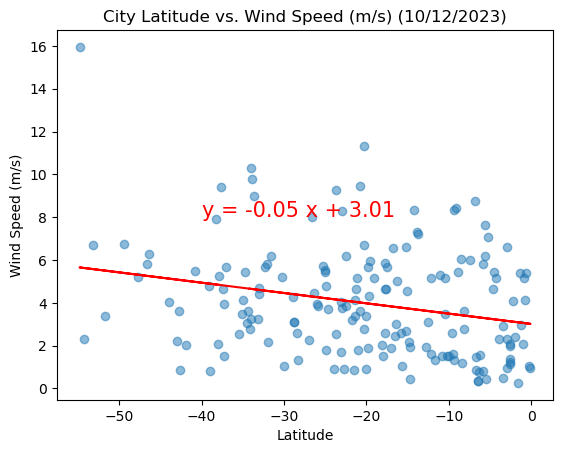

In [151]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
y_lab = ("Wind Speed (m/s)")
coord = (-40,8)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** According to the line of regression, wind speed is lower closer to the equator. However the data is realtively scattered, so I do not believe there is a correlation between wind speed and latitude.